<a href="https://colab.research.google.com/github/sprintup/AI/blob/main/FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report

***
## Data Loaders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/9f_Facial Emotion Detection/Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
from tensorflow.keras.callbacks import History
picture_size = 48

class arnold:
    illBeBack = 'happy'
    hastaLaVistaBaby = 'neutral'
    comeWithMeIfYouWantToLive ='sad'
    getToTheChoppa = 'surprise'
    terminator = 'train'
    judgementDay = 'validation'
    riseOfTheMachines = 'test'



def getFolderPath(emotionType: str = "", dataCategory=arnold.terminator) -> str:
  """
  emotionType = 'happy', 'neutral', 'sad', 'surprise'
  dataCategory = 'train'(default), 'validation', 'test'
  """
  base = "Facial_emotion_images/"
  if emotionType != "":
    return base + dataCategory + "/" + emotionType + "/"
  else:
    return base + dataCategory

def displayImages(emotionType, dataCategory=arnold.terminator):
  folder_path = getFolderPath(emotionType, dataCategory=dataCategory)
  plt.figure(figsize = (12,12))

  for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + os.listdir(folder_path)[i],
                  target_size=(picture_size, picture_size))
    plt.imshow(img)

def getImageDataGenerator():
  return ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=(0.,2.),
                                   rescale=1./255,
                                   shear_range=0.3)

def vectorizeDataGenerator(imageDataGenerator: ImageDataGenerator, dataCategory = arnold.terminator, color_mode = 'rgb', batch_size = 32, img_size = 48, classes = False):
  """
  color_mode = 'rgb' (default), 'grayscale'
  """
  if classes == True:
    classes = [arnold.illBeBack, arnold.comeWithMeIfYouWantToLive, arnold.hastaLaVistaBaby, arnold.getToTheChoppa]
    return imageDataGenerator.flow_from_directory(getFolderPath(dataCategory=dataCategory),
                                              target_size = (img_size, img_size),
                                              color_mode = color_mode,
                                              batch_size= batch_size,
                                              class_mode = 'categorical',
                                              classes = classes,
                                              shuffle = True)
  else:  
    return imageDataGenerator.flow_from_directory(getFolderPath(dataCategory=dataCategory),
                                              target_size = (img_size, img_size),
                                              color_mode = color_mode,
                                              batch_size= batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
  
def plotGraph(history: History, modelName = 'Model Accuracy'):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(modelName)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='upper left')
  plt.show()

In [ ]:
datagen_train = getImageDataGenerator()
train_set = vectorizeDataGenerator(datagen_train)

datagen_validation = getImageDataGenerator()
validation_set = vectorizeDataGenerator(datagen_validation, arnold.judgementDay)

datagen_test = getImageDataGenerator()
test_set = vectorizeDataGenerator(datagen_test, arnold.riseOfTheMachines)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
datagen2_train = getImageDataGenerator()
train_set2 = vectorizeDataGenerator(datagen2_train, color_mode='grayscale', classes=True)

datagen2_validation = getImageDataGenerator()
validation_set2 = vectorizeDataGenerator(datagen2_train, color_mode='grayscale', classes=True, dataCategory=arnold.judgementDay)

datagen2_test = getImageDataGenerator()
test_set2 = vectorizeDataGenerator(datagen2_train, color_mode='grayscale', classes=True, dataCategory=arnold.riseOfTheMachines)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Flatten, LeakyReLU, MaxPooling2D, Dropout

In [ ]:
model3 = Sequential()

#first layer
model3.add(Conv2D(64, (2,2), input_shape = (48,48,1), activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2))
model3.add(Dropout(0.2))

#second layer
model3.add(Conv2D(128, (2,2), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2))
model3.add(Dropout(0.2))


#third layer
model3.add(Conv2D(512, (2,2),padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2))
model3.add(Dropout(0.2))

#fourth block
model3.add(Conv2D(512, (2,2),padding='same',activation='relu'))

#fifth block
model3.add(Conv2D(128, (2,2),padding='same',activation='relu'))

#classification layer
model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(4, activation = 'softmax'))

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
from tensorflow.keras.optimizers import Adam
model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(0.003),
               metrics=['accuracy'])

In [ ]:
model3History = model3.fit(train_set2,
                          validation_data = validation_set2,
                          steps_per_epoch = train_set.n / train_set.batch_size,
                          epochs=35)

Epoch 1/35
472/472 [==============================] - 31s 45ms/step - loss: 1.5354 - accuracy: 0.2894 - val_loss: 1.3600 - val_accuracy: 0.3659
Epoch 2/35
472/472 [==============================] - 18s 39ms/step - loss: 1.3342 - accuracy: 0.3878 - val_loss: 1.1695 - val_accuracy: 0.4808
Epoch 3/35
472/472 [==============================] - 18s 39ms/step - loss: 1.2203 - accuracy: 0.4453 - val_loss: 4.6174 - val_accuracy: 0.1617
Epoch 4/35
472/472 [==============================] - 18s 39ms/step - loss: 1.2152 - accuracy: 0.4515 - val_loss: 1.2360 - val_accuracy: 0.4049
Epoch 5/35
472/472 [==============================] - 19s 39ms/step - loss: 1.1408 - accuracy: 0.4909 - val_loss: 1.0865 - val_accuracy: 0.5138
Epoch 6/35
472/472 [==============================] - 19s 39ms/step - loss: 1.0953 - accuracy: 0.5086 - val_loss: 1.4071 - val_accuracy: 0.3388
Epoch 7/35
472/472 [==============================] - 19s 40ms/step - loss: 1.1092 - accuracy: 0.5014 - val_loss: 1.5592 - val_accuracy:

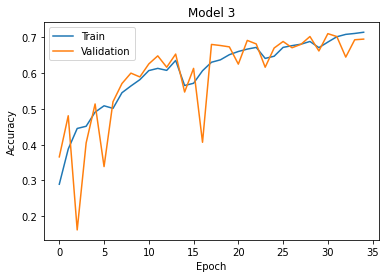

In [ ]:
plotGraph(model3History,"Model 3")
model3.save("./model3")

### Observations of model 3
- This model is significantly more accurate than the pre-trained models that did not have fine tuning.The accuracy of this model for the validation data approach 70% at about 30 epochs before beginning to overfit. 
- Since the model starts to overfit the training data, it would be beneficial to reduce the number of epochs. However, if other adjustments reduce overfitting, perhaps the complete model might converge at a higher accuracy. Such adjustments might be different initial weights, adjusting early stopping parameters.
- The final accuracy on the test set is around 73%

***
## Confusion Matrix

In [ ]:
import numpy as np
import seaborn as sns
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

img_size = 48
test_set = datagen_test.flow_from_directory(getFolderPath(dataCategory=arnold.riseOfTheMachines),
                                            target_size = (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True) 

# test_set = vectorizeDataGenerator(datagen_test,dataCategory=arnold.riseOfTheMachines, color_mode='grayscale',classes=True)


Found 128 images belonging to 4 classes.


4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.62      0.47      0.54        32
           2       0.60      0.75      0.67        32
           3       0.93      0.84      0.89        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.74      0.73      0.73       128



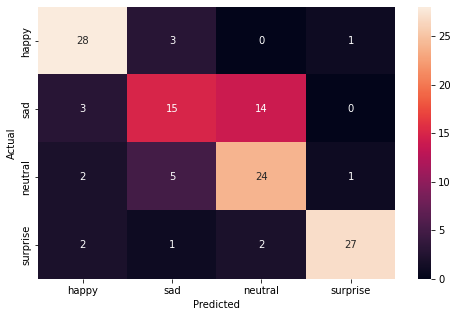

In [ ]:

test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Observations of Model 3 Confusion Matrix
- Sad faces were misclassified as neutral 10 times in the test set of 128 images that was set by the batch_size.
- It's hard to say which order the classification report gives the categories, such as which emotion category relates to 0,1,2,3, but inferring from the [gist](https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d#file-classifier_from_little_data_script_1-py-L49), included in the docs, has the categories for dog and cat listed alphabetically. Further, the [ImageDataGenerator.flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method says the classes will be listed alphanumerically if not prescribed. However, they are prescribed in the order **happy**, **sad**, **neutral**, and **surprised**. So that's the order I'll read the rows in the classification report. 
- The category with the highest f1 score is surprised with 87%, making it the easiest to categorize.
- The category with the lowest f1 score, making it the hardest to categorize is sad, at 58%. 
- Sad was mistaken for happy 3 times, which is not a large amount, but a mistake with more potential impact with applications meant to diagnose conditions like depression.
- Neutral was misclassified as surprised zero times, which bodes well for driving a vehicle equiped with emotion detection software. 

***
## Insights



- Four models were tried and reached these accuracies: 
  - VGG16(50%)
  - ResNet(Untested on test data, ~30% on validation, no convergence)
  - EfficientNet (~30%, again, no convergence)
  - Complex NN Architecture (~73%)
- Two of the 4 models were not producing results, due to their underfitting the data and lack of convergence . These models might be improved with some fine tuning. 
- The models in Milestone 1 reached accuracies of around 64%, 65%, 66%, making the last model the most accurate so far, however, again, these models could be improved with some hyperparameter tuning.
- The model was not as good at determining the difference between emotions like happy/sad, which would make mental health diagnostic software less accurate overall. However, it performed better between suprise/neutral which would make it better in applications like emotion detection while driving. 